In [3]:
#generic imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Getting Help: 

`numpy.lookfor(what, module=None, import_modules=True, regenerate=False, output=None)`

`numpy.info(object=None, maxwidth=76, output=<_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>, toplevel='numpy')`

When used interactively with an object, `np.info(obj)` is equivalent to `help(obj)` on the Python prompt or `obj?` on the IPython prompt.

`numpy.source(object, output=<_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>)`

This works only when source is Python code. 

In [ ]:
np.lookfor('dot')

In [ ]:
np.info(np.dot)

In [ ]:
np.source(np.interp)

 - [About Numpy Arrays](http://localhost:8888/notebooks/My%20notebooks/Python/Python%20Basics/Python%20Numpy%20.ipynb#About-Numpy-Arrays)
 
 - Array Creations
 
 - Indexing, Slicing and Iteration
 
 - Array Stacking and Splitting
 
 - Broadcasting
 
 - Some Useful Tricks
 
 - Universal Functions
 
 - Aggregation and Statistical functions
 
 - Sorting and Searching
 
 - Miscellaneous Functions

### About Numpy Arrays

In Python, you have `list` type. In NumPy, you have `ndarray` type. However, unlike Python lists, `ndarray` are vastly fast, versatile and efficient.  

NumPy’s main object (`ndarray`) is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes. The `ndarray` is also known by its alias `array`.

Examples of NumPy arrays - 

In [7]:
foo = np.array([1,2,3])  # 1-dimensional array
foo

array([1, 2, 3])

In [9]:
bar = np.array([[1,2,3],[4,5,6]])   #2-dimensional array
bar

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
baz = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[1,3,5],[2,4,6],[7,8,9]],[[9,8,7],[6,5,4],[3,2,1]]])  #3-dimensional array
baz

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 3, 5],
        [2, 4, 6],
        [7, 8, 9]],

       [[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]]])

#### Attributes of NumPy arrays

#### `ndarray.ndim`

Number of dimensions (axes). Notice the count of opening square brackets in printed arrays.


In [15]:
print(foo.ndim), print(bar.ndim), print(baz.ndim);

1
2
3


#### `ndarray.shape`

the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with *n* rows and *m* columns, `shape` will be `(n,m)`. The length of the `shape` tuple is therefore the number of axes, `ndim`.

In [17]:
print(foo.shape), print(bar.shape), print(baz.shape);

(3,)
(2, 3)
(3, 3, 3)


#### `ndarray.size`

The total number of elements of the array. This is equal to the product of the elements of `shape`.


In [22]:
print(foo.size), print(bar.size), print(baz.size);

3
6
27


#### `ndarray.dtype`

An object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. `numpy.int32`, `numpy.int16`, and `numpy.float64` are some examples.


In [19]:
print(foo.dtype), print(bar.dtype), print(baz.dtype);

int32
int32
int32


#### `ndarray.itemsize`

The size in bytes of each element of the array. For example, an array of elements of type `float64` has itemsize 8 (=64/8), while one of type `complex32` has itemsize 4 (=32/8). It is equivalent to `ndarray.dtype.itemsize`.


In [20]:
print(foo.itemsize), print(bar.itemsize), print(baz.itemsize);

4
4
4


#### `ndarray.data`

the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [21]:
print(foo.data), print(bar.data), print(baz.data);

#### Axes or Dimensions

In numPy, axis ordering follows `zyx` convention. Visually, it means that for a 2D array where the horizontal axis is `x` and the vertical axis is `y`:

```
    x -->
y      0   1   2
|  0 [[1., 0., 0.],
V  1  [0., 1., 2.]]
```

The shape of this array is `(2, 3)` because it is ordered `(y, x)`, with the first axis `y` of length `2`.

Another example of 3-D array - 

In [158]:
X3 = np.arange(24).reshape(2,3,4)
X3

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [159]:
X3.shape

(2, 3, 4)

Since this is 3-dimensional array, it has 3 axes or dimensions. The first axis has length 2 which means it has 2 elements. If you notice the `X3` array, you'll see two 3\*3 matrices stacked up and separated by a blank line. These 2 sub-arrays are the elements along first axis. The second dimension has length 3. This length represents the 3 rows in each elements of first dimension. Similarily, the last dimension has length 4 which represents columns. 

In many situations, we usually want to do computation along a given axis. For example -  

In [161]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [162]:
np.min(a, axis = 0)

array([0, 1, 2])

Here `axis = 0` refers to first dimension (rows for our example). This means move along `x` axis and find the minimum value in each column. 

In [163]:
np.sum(a, axis = 1)

array([ 3, 12, 21])

In above case, `axis = 1` means move along `y` axis and calculate the sum for each row you encounter. 

In [173]:
a  = np.random.randint(10,size=(3,3))

array([[0, 5, 3],
       [5, 9, 6],
       [4, 9, 8]])

In [182]:
np.sort(a, axis = 0) ,np.sort(a, axis = 1)

(array([[0, 5, 3],
        [4, 9, 6],
        [5, 9, 8]]),
 array([[0, 3, 5],
        [5, 6, 9],
        [4, 8, 9]]))

See above example. When `axis` was set to `0`, we move along first axis (x-axis) and sort each column we encounter. Similarily in case of `axis = 1`, we move along 2 axis (y axis) and sort each row we encounter.   

#### Printing arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

 - the last axis is printed from left to right,

 - the second-to-last is printed from top to bottom,

 - the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [23]:
foo # 1-dim array

array([1, 2, 3])

In [24]:
bar #2-d

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
baz #3-d

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 3, 5],
        [2, 4, 6],
        [7, 8, 9]],

       [[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]]])

### Array creations

There are multiple ways to create a NumPy array. Most common ones are described below. See [this doc page](https://numpy.org/doc/stable/reference/routines.array-creation.html) for complete reference. 

#### `np.array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0, like=None)`

Although this function can take many parameters, we'll be concerned with `object`, `dtype` and `ndim`.

In [26]:
np.array([1,2,3])

array([1, 2, 3])

In [28]:
np.array([1,2,3], float)

array([1., 2., 3.])

In [33]:
np.array([1,2,3], ndmin=2)

array([[1, 2, 3]])

In [34]:
np.array(range(4))

array([0, 1, 2, 3])

In [35]:
np.array(1) #0-dimeansional array

array(1)

#### Note

Lists passed to Numpy should have same number of elements. Otherwise you'll get 1-D array with `object` dtype:

In [510]:
import numpy as np

a = np.array([[1,2,3],[4,5]])
a, a.shape

C:\Users\pcxyz\AppData\Local\Temp/ipykernel_1632/2903244545.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([[1,2,3],[4,5]])


(array([list([1, 2, 3]), list([4, 5])], dtype=object), (2,))

Following are the ways when you don't have data but know the dimensions or value to be filled.

`numpy.empty(shape, dtype=float, order='C', *, like=None)` - Return a new array of given shape and type, without initializing entries.

In [39]:
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

`numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)` - Return a 2-D array with ones on the diagonal and zeros elsewhere. `N` for rows in output. `M` for columns in output, defaults to `N`. `K` for Index of the diagonal: 0 (the default) refers to the main diagonal, a positive value refers to an upper diagonal, and a negative value to a lower diagonal.

In [40]:
np.eye(3,4,1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [41]:
np.eye(4,4,1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [42]:
np.eye(3,4,-1)

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

`numpy.identity(n, dtype=None, *, like=None)` - Return the identity array. The identity array is a square array with ones on the main diagonal.

In [43]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

` numpy.ones(shape, dtype=None, order='C', *, like=None)` - Return a new array of given shape and type, filled with ones.

In [44]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

` numpy.zeros(shape, dtype=None, order='C', *, like=None)` - Return a new array of given shape and type, filled with zeros.

In [45]:
np.zeros(2)

array([0., 0.])

`numpy.full(shape, fill_value, dtype=None, order='C', *, like=None)`

In [46]:
np.full((2,3),4)

array([[4, 4, 4],
       [4, 4, 4]])

`numpy.fromiter(iter, dtype, count=- 1, *, like=None)`

In [47]:
iterable = (x*x for x in range(5))
np.fromiter(iterable, float)

array([ 0.,  1.,  4.,  9., 16.])

`np.fromfunction(function, shape, *, dtype=<class 'float'>, like=None, **kwargs)`

This one is a bit tricky. `shape` would be an usual tuple describing the shape of output. Note that rank of shape (length of shape tuple) decides the number of argument `function` will take. For example, `shape`= (2,2) means function will take 2 arguments. Similarily `shape` = (2,2,3) means function will take 3 arguments. Secondly, input will take following form - 

`shape` =  (2,2)

```
   j=0|j=1
---------
i=0|00|01
---------
i=1|10|11
```

So basically `function` will take 2 arguments and it will calculate 4 different value based on the arguments `[0,0]`,`[0,1]`,`[1,0]` and `[1,1]`.

All the `**kwargs` will be passed to `function`.
  

In [4]:
def f(*args):
    return sum(args) 

In [5]:
np.fromfunction(f, (2,3))

#(0,0) (0,1) (0,2) 
#(1,0) (1,1) (1,2)

array([[0., 1., 2.],
       [1., 2., 3.]])

In [56]:
np.fromfunction(lambda i, j: i+ j, (2, 2))

array([[0., 1.],
       [1., 2.]])

In [60]:
np.fromfunction(lambda i, j: i==j, (2, 2))

array([[ True, False],
       [False,  True]])

#### Numerical ranges

`numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)`



In [61]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
np.arange(10,1,-1) #step is negative 

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

While using `arange` Be careful when floats are involved. For floating point arguments, the length of the result is `ceil((stop - start)/step)`. Because of floating point overflow, this rule may result in the last element of output being greater than `stop`.

The actual step value used to populate the array is `dtype(start + step) - dtype(start)` and not `step`. Precision loss can occur here, due to casting or due to using floating points when `start` is much larger than `step`. This can lead to unexpected behaviour. For example:

In [65]:
np.arange(0, 5, 0.5, dtype=int   #careful!!!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
np.arange(-3, 3, 0.5, dtype=int)  #caruful!!!

array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [69]:
np.arange(10,1,-1).reshape(3,3)  #note the use of reshape method

array([[10,  9,  8],
       [ 7,  6,  5],
       [ 4,  3,  2]])

`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

In [70]:
np.linspace(1,10) #by default 50 values between 1 and 10

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [71]:
np.linspace(1,10,20, endpoint = False) #endpoint 20 won't be included

array([1.  , 1.45, 1.9 , 2.35, 2.8 , 3.25, 3.7 , 4.15, 4.6 , 5.05, 5.5 ,
       5.95, 6.4 , 6.85, 7.3 , 7.75, 8.2 , 8.65, 9.1 , 9.55])

Although `dtype` is inferred from `start` and `stop` value, it is never set to `int` even though `start` and`stop` are integers. In this case, `dtype` will be `float`.

In [72]:
np.linspace(1,10,20).astype('int')

array([ 1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
        9,  9, 10])

In [73]:
np.linspace(1,7,10, retstep = True) #step value will also be provided if `retstep` is True

(array([1.        , 1.66666667, 2.33333333, 3.        , 3.66666667,
        4.33333333, 5.        , 5.66666667, 6.33333333, 7.        ]),
 0.6666666666666666)

`numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)`

Return numbers spaced evenly on a log scale.

In linear space, the sequence starts at `base ** start` and ends with `base ** stop` (see endpoint below).

In [77]:
a = np.logspace(2,4,4)
a

array([  100.        ,   464.15888336,  2154.43469003, 10000.        ])

The points in above array can be calculated by raising the power of 10 to the corresponding element in `np.linspace`.

In [78]:
b = np.linspace(2,4,4)
b

array([2.        , 2.66666667, 3.33333333, 4.        ])

In [80]:
10**b

array([  100.        ,   464.15888336,  2154.43469003, 10000.        ])

`numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')`

In [101]:
nx, ny = (3,2)

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
x1, y1 = np.meshgrid(x, y , indexing = 'ij')  #output of shape (nx, ny)

In [102]:
x1, y1

(array([[0. , 0. ],
        [0.5, 0.5],
        [1. , 1. ]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.]]))

In [81]:
nx, ny = (3,2)

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
x, y

(array([0. , 0.5, 1. ]), array([0., 1.]))

In [82]:
xv, yv = np.meshgrid(x, y)  #indexing is `xy` so output is of shape (ny, nx)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [83]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [100]:
xv.shape, yv.shape

((2, 3), (2, 3))

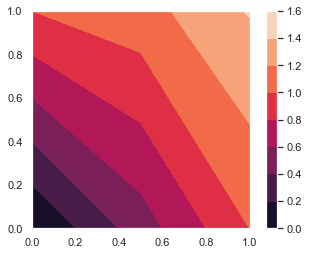

In [97]:
zs = np.sqrt(xv**2 + yv**2)

plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()

In [98]:
zs

array([[0.        , 0.5       , 1.        ],
       [1.        , 1.11803399, 1.41421356]])

####  Reshaping through `reshape()` method

Original array and reshaped array should have same `size` value.

In [195]:
ar = np.linspace(1,10,15) #1-d array with 15 elements
ar.reshape(3,5) 

array([[ 1.        ,  1.64285714,  2.28571429,  2.92857143,  3.57142857],
       [ 4.21428571,  4.85714286,  5.5       ,  6.14285714,  6.78571429],
       [ 7.42857143,  8.07142857,  8.71428571,  9.35714286, 10.        ]])

In [197]:
ar.reshape(3,-1) # -1 means provide whatever is needed here

array([[ 1.        ,  1.64285714,  2.28571429,  2.92857143,  3.57142857],
       [ 4.21428571,  4.85714286,  5.5       ,  6.14285714,  6.78571429],
       [ 7.42857143,  8.07142857,  8.71428571,  9.35714286, 10.        ]])

In [200]:
ar.reshape(-1,3)

array([[ 1.        ,  1.64285714,  2.28571429],
       [ 2.92857143,  3.57142857,  4.21428571],
       [ 4.85714286,  5.5       ,  6.14285714],
       [ 6.78571429,  7.42857143,  8.07142857],
       [ 8.71428571,  9.35714286, 10.        ]])

#### Random Number Generation

In [322]:
np.random.rand(3,2) #random float values from uniform distribution range[0,1) in shape (3,2)

array([[0.37486651, 0.23664702],
       [0.77777862, 0.43476323],
       [0.61693661, 0.84522501]])

In [323]:
np.random.random((3,2)) #random values from uniform dist range[0,1) in shape (3,2). Notice that shape is passed as tuple.

#np.random.random_sample is exactly the same as above

array([[0.39558836, 0.66491042],
       [0.00164478, 0.64617287],
       [0.13863016, 0.6927405 ]])

In [324]:
np.random.randint(1,5,size=(4,3)) #random integer from range[1,5)

array([[4, 1, 1],
       [4, 3, 3],
       [1, 1, 3],
       [4, 1, 4]])

In [328]:
np.random.randn(2,3) #values from standard normal distribution with mean = 0 and varianvce  =  1

array([[-0.25513903, -0.60079918,  1.01587361],
       [-0.75287114, -1.02752643,  0.718404  ]])

In [334]:
a = np.random.normal(10,2,100)

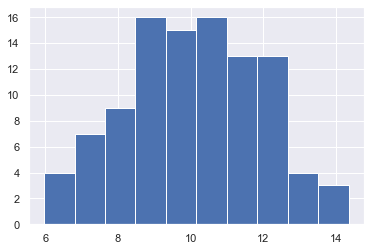

In [335]:
plt.hist(a);

In [336]:
for i in range(10):
    print(np.random.choice(5,2)) 

#first argument for boundary value(exclusive), second argument for number of values to be drawn.
#additional parameter p can also be included for probability distribution.
#np.random.choice(a, size=None, replace = True, p = None)-a may be int or array-like, size may be int or tuple (for shape)

[4 3]
[0 0]
[2 3]
[1 0]
[2 2]
[2 0]
[0 0]
[3 0]
[0 4]
[4 4]


In [337]:
for i in range(3):
    print(np.random.choice([1,3,5,7], (2,3)))

[[5 7 7]
 [3 1 3]]
[[3 5 1]
 [1 1 3]]
[[3 1 1]
 [7 5 3]]


In [338]:
arr = np.arange(10)
print(arr)
np.random.shuffle(arr) #in place shuffling, shuffling only along the first axis
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[2 6 0 3 5 1 7 8 9 4]


In [339]:
a = np.random.binomial(10,.5)
print(a)
#10 trials, with probability of success of 0.5 of each trial, single test (omitted here). 
#O/p a is the number of successful instances.
b = np.random.binomial(9,.4,10)
#single test consists of 9 trials. 10 such tests are conducted. 
print(b)

4
[2 4 2 4 2 3 3 6 3 2]


[  1.   0.   0.   1.   4.   1.   1.   3.   0.   7.  10.  15.  22.  18.
  43.  46.  75. 100. 170. 247. 266. 383. 516. 685. 767. 834. 944. 954.
 882. 752. 586. 459. 353. 241. 170. 152.  95.  68.  43.  24.  19.   9.
   6.  11.   7.   2.   3.   3.   1.   1.]
[ 0.03576457  0.40868084  0.78159712  1.15451339  1.52742967  1.90034595
  2.27326222  2.6461785   3.01909477  3.39201105  3.76492732  4.1378436
  4.51075988  4.88367615  5.25659243  5.6295087   6.00242498  6.37534125
  6.74825753  7.12117381  7.49409008  7.86700636  8.23992263  8.61283891
  8.98575518  9.35867146  9.73158774 10.10450401 10.47742029 10.85033656
 11.22325284 11.59616911 11.96908539 12.34200167 12.71491794 13.08783422
 13.46075049 13.83366677 14.20658304 14.57949932 14.9524156  15.32533187
 15.69824815 16.07116442 16.4440807  16.81699698 17.18991325 17.56282953
 17.9357458  18.30866208 18.68157835]
<BarContainer object of 50 artists>


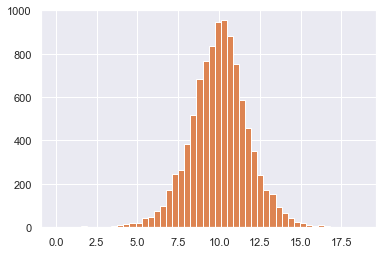

In [340]:
s = np.random.logistic(10,1,10000)
plt.hist(s, bins = 50)
count, bins, ignored = plt.hist(s, bins =50)
print(count), print(bins), print(ignored);

In [341]:
a = np.random.permutation(10)
b = np.random.permutation([1,4,3,8,7])
c = np.arange(10).reshape(5,2)
d = np.random.permutation(c) #If `c` is a multi-dimensional array, it is only shuffled along its first index.
print(a)
print('\n')
print(b)
print('\n')
print(c)
print('\n')
print(d)

[3 1 7 0 8 6 2 4 9 5]


[8 3 4 7 1]


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


[[4 5]
 [8 9]
 [6 7]
 [0 1]
 [2 3]]


In [342]:
x = np.random.poisson(3,40)
x

array([3, 2, 3, 4, 2, 2, 3, 2, 5, 7, 1, 1, 5, 2, 1, 5, 3, 5, 2, 2, 2, 2,
       3, 6, 1, 3, 1, 1, 2, 2, 2, 3, 3, 4, 6, 4, 1, 5, 5, 4])

In [343]:
np.mean(x), np.var(x)

(3.0, 2.55)

### Indexing, Slicing and Iteration

There are two ways of indexing -  

 - Basic Indexing (always returns a 'view')
 - Fancy Indexing (always returns a 'copy')
 
 - Basic Indexing syntax - `x[exp_1,..]` where `exp_1` is either an integer or a slice
 - Fancy Indexing syntax - `x[exp_1]` where `exp_1` is an integer array or a boolean array
 
#### Basic Indexing

Given a N-dimensional array `x`, basic syntax for indexing is `x[exp_1,.., exp_k, ..,exp_N]` where `exp_k` etc is of the form `start:stop:step`and corresponds to `k`th dimension. `exp`s are matched positionally with dimensions. 

In `start:stop:step`, `start` defaults to zero, `stop` defaults to rank in that dimension, and `step` defaults to `1` unless specified otherwise. The default settings provide 'complete slice'. So `start:stop:step` means start taking elements from `start` (inclusive), go through in `step` and stop at `stop` (exclusive).  

For example if an array has (2,3,4) shape, it can have maximum of 3 `exp`s because this  array is 3-dimensional. Also, this array has rank 2 in its first dimension, rank 3 in second dimension and rank 4 in last dimension. This provides `stop` value in respective dimension. 

You can provide fewer `exp`s. In that case, missing `exp`s take the form of `start:stop:step` with default values (and give complete slice in that dimension). Also these `exp`s will correspond to successive dimensions. If you don't want that, use `:` for that dimension. For example, suppose you have 3-d array `x` and you are providing only one `exp`, say, `1:2:1`. So if you write `x[1:2:1]`, this will mean that `1:2:1` will correspond to first dimension. If you want to use this slice for, say, second dimension, you would write `x[:, 1:2:1, :]`. In this way, you are making it clear that you are using `1:2:1` for second dimension only. A bare `:` means complete slice in that dimension. 

If `exp` (that is `start:stop:step`) only have one number `i`, it translates to `i:i+1:1` or simply `i:i+1`. This gives element at `i`th position. 

Go through the following examples carefully to better understand the rules - 

#### Note to self

try to use the term selection tuple and show that `array[exp1, exp2]` is same as `array[(exp1, exp2)]`. 


#### 1 - D array

In [135]:
a1 = np.linspace(1,5,10) # shape(10,) so it is 1-d array and rank of this dimension is 10

print(a1.shape) 
print(a1)

(10,)
[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]


Since above array is 1-D, it will have only one `exp`

In [141]:
a1[0:10:1] #since all values equal to defaults, it will complete slice. In this case, original array

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [136]:
a1[1:6:1] #element at 6 will not be included. Equivalent to a1[1:6] since `step` defaults to 1 anyway

array([1.44444444, 1.88888889, 2.33333333, 2.77777778, 3.22222222])

In [138]:
a1[1] #Only a number given so equivalent to a1[1:2:1] or a1[1:2]. Not same as a1[1:]

1.4444444444444444

In [139]:
a1[1::] # stop defaults to rank, that is, 10. step defaults to 1

array([1.44444444, 1.88888889, 2.33333333, 2.77777778, 3.22222222,
       3.66666667, 4.11111111, 4.55555556, 5.        ])

In [140]:
a1[1:] #same as a1[1::]

array([1.44444444, 1.88888889, 2.33333333, 2.77777778, 3.22222222,
       3.66666667, 4.11111111, 4.55555556, 5.        ])

In [110]:
a1[:6:2] #start defaults to 0, step is 2 here

array([1.        , 1.88888889, 2.77777778])

#### 2-Dimensional array indexing and slicing

In [114]:
a2 = np.arange(1,10).reshape(3,3)
a2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Since `a2` is 2-D, it can have 2 `exp`, seperated by `,`. 

In [145]:
a2[0:3:1, 0:3:1] #each 'exp' uses default values so original array is returned

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [143]:
a2[:2, :1] 
#in first dimension (or axis), take first two elements then in those two elements, take only first element 
# so :2 gives us first 2 rows, and :1 gives us values from first column from those 2 rows. 

array([[1],
       [4]])

In [121]:
a2[1,2] # equivalent to a2[1:2,2:3] so pick second row and then pick value from last column in that row 

6

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [147]:
a2[:2] #fewer indices. The provided index refer to first dimension by default. 

array([[1, 2, 3],
       [4, 5, 6]])

In [146]:
a2[:2,:] #same as above

array([[1, 2, 3],
       [4, 5, 6]])

In [148]:
a2[:, :2] #now :2 refers to second dimension. First index gives all rows, second index gives first 2 columns

array([[1, 2],
       [4, 5],
       [7, 8]])

In [150]:
a2[-3:-1]

array([[1, 2, 3],
       [4, 5, 6]])

In [133]:
a2[...,-1] #see below note

array([3, 6, 9])

The dots (`...`) represent as many colons as needed to produce a complete indexing tuple.

In [115]:
a2[-1,...] 

array([7, 8, 9])

In [126]:
a2[2][1] #you can do this to access an element

8

In [128]:
a2[2,1] #but this is more efficient because in earlier case, you are creating 2 views but here only 1 view

8

In [189]:
a2[::-1] #row reversal

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [190]:
a2[:, ::-1] #column reversal

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

In [191]:
a2[::-1, ::-1] #both rows and columns are reversed

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

#### 3-D array

In [151]:
a3 = np.arange(1,19).reshape(2,3,3)
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

`a3` now has 3 dimensions. First dimension has rank 2, second 3 and last dimension has rank 3. First dimension consists of 2 2-D array. Since it is 3-D array, it can have maximum three `exp` or index (one index per dimension). 


In [153]:
a3[1:2, 2:3,2:3] #1st index -> 2nd 2-D matrix, 2nd index - second row of that matrix, 3rd index -> last column

array([[[18]]])

In [154]:
a3[1] # equivlent to a3[1,:,:] -> a3[1:2,:,:]

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [157]:
a3[1,1]

array([13, 14, 15])

**Note** that when fewer indices than dimensions are provided, the resultant array is subdimensional array. See above 2 examples.

#### Slices are views

This means any change made in a slice will reflect in original array. 

In [177]:
array = np.arange(1,10).reshape(3,3)
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [182]:
array[0,1] = 22
array  #changed is reflected here

array([[ 1, 22,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

If you don't want this, use `copy()` method - 

In [183]:
c = array[1,1].copy()
c = 55
c

55

In [184]:
array #no change

array([[ 1, 22,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

**Iteration is done wrt first axis.**

In [124]:
for i in a2:
    print(i)

[1 2 3]
[4 5 6]
[7 8 9]


In [156]:
for i in a3:
    print(i),

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]


#### Using `np.newaxis` or `None` to expand the  dimensions

Each `newaxis` object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension. `None` is just an alias for `newaxis`

In [171]:
a = np.arange(1,10)
a.shape, a

((9,), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [166]:
a[np.newaxis,:] #(1,9) shape

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [172]:
a[None, :]

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [170]:
a[:, np.newaxis]  #(9,1) shape

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [174]:
a[:, None]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

#### Fancy (or Advance) Indexing

Advanced indexing is triggered when the selection object, `exp`, is a non-tuple sequence object, an ndarray (of data type integer or bool), or a tuple with at least one sequence object or ndarray (of data type integer or bool). There are two types of advanced indexing: integer and Boolean.

In basic indexing, we provided a selection tuple (`exp` in `x[exp]`) whose elements were of the form `start:stop:step`. In other words, we were essentially providing a continuous range for each dimension. 

#### Integer Indexing

Integer array indexing allows selection of arbitrary items in the array based on their N-dimensional index. Each integer array represents a number of indices into that dimension.


In [210]:
arr = np.arange(1,16)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [211]:
arr[[0,2,4]] #now selection object is another array 

array([1, 3, 5])

A integer `i` in the selection array must be such that `0 <= i < rank` (in that dimension). If `i` is negative, it should be in range `[-1, -rank]`. If this condition is not met, `IndexError` is raised.

In [212]:
arr[[1,16]]

IndexError: index 16 is out of bounds for axis 0 with size 15

In [213]:
mask = np.arange(1,6)
arr[mask]

array([2, 3, 4, 5, 6])

In [214]:
arr[[-1, 14]]

array([15, 15])

In [217]:
mask2d = np.array([[1,2],[4,5]]) #list of lists won't work here

arr[mask2d] #output shape will match with that of mask2d. 

array([[2, 3],
       [5, 6]])

#### Integer indexing in case of multi-dimensional array

In [218]:
X = np.arange(12).reshape((3, 4))
X # (3,4) shape

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [219]:
X[np.array([0,1,2]), np.array([2,1,3])] #2 array corresponding to dimensions of original array

#first array for first dimension, second array for second dimension. 

array([ 2,  5, 11])

Fewer index arrays than dimension of original can be provided.

In [221]:
X[np.array([1,1,2])] #no second array means complete slice in second dimension

array([[ 4,  5,  6,  7],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned elsewhere.
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result.

Indexing arrays should have matching shape. If shapes are not matched, there is an attempt to broadcast. If broadcast isn't successful, error is raised. 

In [222]:
X[np.array([0,1,2]), np.array([2,1])]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [223]:
X[np.array([0,1,2]), 1] #due to broadcasting, second array is [1,1,1]

array([1, 5, 9])

In [225]:
Y = np.arange(12).reshape(4,3)
Y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Suppose we need to select corner elements. 

In [226]:
rows = np.array([[0,0],[3,3]])
columns = np.array([[0,2],[0,2]])

Y[rows, columns]

array([[ 0,  2],
       [ 9, 11]])

However, since the indexing arrays above just repeat themselves, broadcasting can be used (compare operations such as `rows[:, np.newaxis] + columns`) to simplify this:

In [228]:
rows = np.array([0, 3])
columns = np.array([0, 2])

rows = rows[:, np.newaxis] #(2,1) shape
rows

array([[0],
       [3]])

In [229]:
Y[rows, columns] #columns will be broadcast in accordance with the shape of rows (2,1)

array([[ 0,  2],
       [ 9, 11]])

#### Boolean Indexing

It is much like Integer indexing except arrays of boolean elements are provided in selection object `exp`.  

In [22]:
b1 = np.linspace(1,5,10)
b1

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [23]:
b_mask = np.array([True, False]*5)
b_mask

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [24]:
b1[b_mask]

array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556])

Boolean indexing `x[exp]` is practically identical to integer indexing `x[exp.nonzero()]`

In [29]:
aa = b_mask.nonzero()

In [31]:
b1[aa] #integer indexing

array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556])

In [32]:
b1

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

**Note** - Following was supposed to work as per [doc](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing) but  it didn't. See my question on [StackOverflow](https://stackoverflow.com/questions/70738869/dont-understand-the-numpy-boolean-indexing-documentation)

In [40]:
a = np.array([1,2,3,4,5])
mask= np.array([True, False]) ##as per docs, remainining indices will be filled with False elements?????

a[mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 2

In some cases, you may wish to find out non-`NaN`elements in an array-

In [37]:
x = np.array([[1., 2.], [np.nan, 3.], [np.nan, np.nan]])

~np.isnan(x)  #note the use of `~` bit-flip operator

array([[ True,  True],
       [False,  True],
       [False, False]])

In [38]:
x[~np.isnan(x)]

array([1., 2., 3.])

In general, when the boolean array has fewer dimensions than the array being indexed, this is equivalent to `x[b, ...]`, which means `x` is indexed by `b` followed by as many `:` as are needed to fill out the rank of `x`. Thus the shape of the result is one dimension containing the number of `True` elements of the boolean array, followed by the remaining dimensions of the array being indexed. A tip - Just notice the dimension which contains boolean elements. Selection will be done in that dimension. 

`x.shape = (a,b,c)`

`b.shape = (a,b,c)`

Above is straightforward case. This result in 1-D array. If `c` has `n` `True` elements, shape will be `(n,)`

`x.shape = (a,b,c)`

`b.shape = (a,b)`

In this case, `x[b]` is equivalent to `x[b,:]`. This means no boolean indexing in last axis. So this will basically select elements in second dimension (axis). If `b` has `n` `True` elements, shape will be `(n, c)`.

`x.shape = (a,b,c)`

`b.shape = (a,)`

Elements will be selected from firt dimension. If `a` has `n` `True` elements, shape will be `(n, b, c)`.

In [65]:
x = np.arange(35).reshape(5, 7)
b = x > 20
b[:, 5]

array([False, False, False,  True,  True])

In [66]:
x

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [67]:
x[b[:, 5]]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [69]:
x[ b[:,5],:]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

See another example below -

In [92]:
x = np.arange(30).reshape(2, 3, 5)
b = np.array([[True, True, True], [False, True, True]])

x[b]  #elements will be selected from second dimension


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [93]:
b

array([[ True,  True,  True],
       [False,  True,  True]])

In [94]:
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [91]:
x[b,:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [82]:
c = [[[True, False, True, False, False],[True, False, True, False, False],[True, False, True, False, False]],[[True, False, True, False, False],[True, False, True, False, False],[True, False, True, False, False]]]
c1 = np.array(c)
c1.shape

(2, 3, 5)

In [86]:
x[c1] #elements will be selected from last dimension

array([ 0,  2,  5,  7, 10, 12, 15, 17, 20, 22, 25, 27])

In [87]:
c1

array([[[ True, False,  True, False, False],
        [ True, False,  True, False, False],
        [ True, False,  True, False, False]],

       [[ True, False,  True, False, False],
        [ True, False,  True, False, False],
        [ True, False,  True, False, False]]])

In [97]:
c2= np.array([True, False]) #elements will selected from first dimension

x[c2]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]])

In [98]:
c2.shape

(2,)

Example - 

From an array, select all rows which sum up to less or equal two:

In [107]:
x = np.array([[0, 1], [1, 1], [2, 2]])
rowsum = x.sum(-1)

rowsum <= 2

array([ True,  True, False])

In [108]:
x[rowsum <=2,:]

array([[0, 1],
       [1, 1]])

Use boolean indexing to select all rows adding up to an even number. At the same time columns 0 and 2 should be selected with an advanced integer index.

In [110]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])

columns = [0, 2]
rows = (x.sum(-1) % 2) == 0

rows

array([False,  True, False,  True])

In [111]:
rows = rows.nonzero()[0]
x[rows[:, np.newaxis], columns]

array([[ 3,  5],
       [ 9, 11]])

####  Use of `&` and `|` operators

Before we proceed, let us understand the difference between `and` and `&`. They both are similar except `and` operates on objects but `&` operates on bits of objects.

In [112]:
3 and 12, 3 & 12

(12, 0)

In [113]:
True and False, True & False

(False, False)

In [120]:
a = [1,2,3]
b = [2,0,4]

a and b

[2, 0, 4]

In [116]:
a & b

TypeError: unsupported operand type(s) for &: 'list' and 'list'

When it comes to Numpy, things are a bit *opposite* - 

In [118]:
a = np.array([1,2,3])
b = np.array([2,0,4])

a & b

array([0, 0, 0], dtype=int32)

In [119]:
a and b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

See [this SO Post](https://stackoverflow.com/questions/22646463/and-boolean-vs-bitwise-why-difference-in-behavior-with-lists-vs-nump).

In [123]:
a = np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])
a >= 3 

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False])

In [124]:
a <=5

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True])

In [125]:
a[(a >= 3) & (a <= 5)]

array([3, 4, 5, 5, 4, 3])

One can also modify the array through boolean indexing

In [126]:
a[(a >= 3) & (a <= 5)] = -1
a

array([ 1,  2, -1, -1, -1,  6,  7,  6, -1, -1, -1,  2,  1])

#### Combining advanced and basic indexing

In [129]:
X = np.arange(12).reshape(3,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [130]:
X[2,[2,0,1]] #first part basic indexing, second part advance integer indexing

array([10,  8,  9])

In [138]:
X[2:3,[2,0,1]] 

array([[10,  8,  9]])

In [134]:
X[[2,0,1]]

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [137]:
X[[2,0,1], 2]

array([10,  2,  6])

In [139]:
x = np.arange(35).reshape(5, 7)
b = x > 20
b

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [140]:
x[b[:, 5], 1:3]

array([[22, 23],
       [29, 30]])

In [141]:
x[b[:, 5]]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [142]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])

x[1:2, 1:3]

array([[4, 5]])

In [143]:
x[1:2, [1, 2]]

array([[4, 5]])

### Array Stacking and Splitting

#### Horizontal Stacking  - `np.hstack(tuple)`

This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis. Rebuilds arrays divided by `hsplit`. 

The arrays must have the same shape along all but the second axis, except 1-D arrays which can be any length.

In [371]:
#in case of 1-d, length can be different

a = np.array([1,2,3])
b = np.array([4,5,6,7])
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6, 7])

In [374]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
np.hstack((a,b))                  #shape(2,6) second dimension length is affected

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

In [379]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,14).reshape(2,4)  #here length of second axis different from a's second axis length
np.hstack((a,b))                  #shape(2,7) second dimension length is affected

array([[ 0,  1,  2,  6,  7,  8,  9],
       [ 3,  4,  5, 10, 11, 12, 13]])

In [380]:
a = np.arange(12).reshape(2,2,3)
b = np.arange(12,30).reshape(2,3,3) #again length of second dim in both a and b are different

print(a)
print('\n')
print(b)

np.hstack((a,b))   #shape (2,4,3)  again, second dimension is length affected

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


[[[12 13 14]
  [15 16 17]
  [18 19 20]]

 [[21 22 23]
  [24 25 26]
  [27 28 29]]]


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]],

       [[ 6,  7,  8],
        [ 9, 10, 11],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

#### Vertical Stacking - `np.vstack(tuple)`

Stack arrays in sequence vertically (row wise).

This is equivalent to concatenation along the first axis after 1-D arrays of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by `vsplit`.

The arrays must have the same shape along all but the first axis. 1-D arrays must have the same length.

In [381]:
a = np.array([1,2,3])     #converted to (1,3) shape
b = np.array([4,5,6])     #converted to (1,3) shape
c = np.array([7,8,9,10])  #converted to (1,4) shape, second dimension length different from that of a and b

np.vstack((a,b))          # output is of (2,3) shape

array([[1, 2, 3],
       [4, 5, 6]])

In [382]:
np.vstack((a,c)) #error because 1-d arrays have different length so columns didn't match up

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 4

In [383]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,15).reshape(3,3)
c = np.arange(8).reshape(2,4)      #this can't v-stacked against a or b  

In [384]:
np.vstack((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [387]:
a = np.arange(18).reshape(2,3,3)
b = np.arange(18,45).reshape(3,3,3)

np.vstack((a,b)) #shape (5,3,3) #1st dim length can be different, rest dim should have same length

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]]])

#### Horizontal Splitting of array -  `np.hsplit(ary, indices_or_sections)`

Split an array into multiple sub-arrays horizontally (column-wise).

Please refer to the split documentation. hsplit is equivalent to `split` with `axis=1`, the array is always split along the second axis regardless of the array dimension.  

In [393]:
x = np.arange(32).reshape(4, 8)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [394]:
np.hsplit(x, 2) #splitting along 2nd dim, that is columns will be splitted in 2-d array case

[array([[ 0,  1,  2,  3],
        [ 8,  9, 10, 11],
        [16, 17, 18, 19],
        [24, 25, 26, 27]]),
 array([[ 4,  5,  6,  7],
        [12, 13, 14, 15],
        [20, 21, 22, 23],
        [28, 29, 30, 31]])]

In [395]:
np.hsplit(x, np.array([3, 6])) #note the output, it has 3 arrays

#np.array([3,6]) -> first array with col_index 0 to 2, 2nd with col_index 3 to 5, remaining in last array

[array([[ 0,  1,  2],
        [ 8,  9, 10],
        [16, 17, 18],
        [24, 25, 26]]),
 array([[ 3,  4,  5],
        [11, 12, 13],
        [19, 20, 21],
        [27, 28, 29]]),
 array([[ 6,  7],
        [14, 15],
        [22, 23],
        [30, 31]])]

In [397]:
x = np.arange(8.0).reshape(2, 2, 2)
x

array([[[0., 1.],
        [2., 3.]],

       [[4., 5.],
        [6., 7.]]])

In [398]:
np.hsplit(x, 2) #splitting done along 2nd dim i.e. along rows this time

[array([[[0., 1.]],
 
        [[4., 5.]]]),
 array([[[2., 3.]],
 
        [[6., 7.]]])]

#### Vertical Splitting of array -  `vsplit(ary, indices_or_sections)`

Please refer to the split documentation. `vsplit` is equivalent to split with `axis=0` (default), the array is always split along the first axis regardless of the array dimension.

In [460]:
x = np.arange(16.0).reshape(4, 4)
np.vsplit(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [461]:
np.vsplit(x, np.array([3, 6])) #output has 3 arrays, last one is empty array

[array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]),
 array([[12., 13., 14., 15.]]),
 array([], shape=(0, 4), dtype=float64)]

#### Generic splitting function `np.split(ary, indices_or_sections, axis=0)`

Instead of using `vsplit` or `hsplit`, we can simply use the `split` function. `np.split(ary, indices_or_sections, axis=0)` is equivalent to `vsplit(ary, indices_or_sections)` and `np.split(ary, indices_or_sections, axis=1)` is equivalent to `hsplit(ary, indices_or_sections)`

In [462]:
np.split(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [463]:
np.split(x, np.array([3,6]))

[array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]),
 array([[12., 13., 14., 15.]]),
 array([], shape=(0, 4), dtype=float64)]

#### Concatenation of arrays - `numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")`

Join a sequence of arrays along an existing axis.

The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default). If axis is `None`, arrays are flattened. 

In [409]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

np.concatenate((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [410]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [411]:
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. 

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

 1. they are equal, or

 2. one of them is 1

Arrays do not need to have the same number of dimensions.



In [147]:
a = np.arange(6).reshape(2,3) #shape is (2,3)
b = np.array([2])             #shape is (1,)
a*b

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In above example, we have 2 arrays of different dimensions. Starting from right, we see `3` is not equal to `1` but one of them is `1`. So second array is stretched to match the shape wrt to first array. 

The rules for broadcasting are as follows - 

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

Example 1 - 

In [148]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [149]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

Example 2 - 

In [150]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)


Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [151]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##### Example 3

However in following case, even after applying both rules, the final shapes don't match up so addition of both arrays raises ValueError. 

In [152]:
#broadcasting? No chance.
a = np.arange(4)
a + np.array([1, 2])


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

### Some useful tricks

##### Flipping the array - `np.flip`

In [210]:
a = np.random.randint(12, size = (3,3))
a

array([[10,  0,  3],
       [10,  2,  3],
       [10, 11,  8]])

In [211]:
np.flip(a) #both rows and columns are reversed

array([[ 8, 11, 10],
       [ 3,  2, 10],
       [ 3,  0, 10]])

In [212]:
np.flip(a, axis = 0), np.flip(a, axis = 1)

(array([[10, 11,  8],
        [10,  2,  3],
        [10,  0,  3]]),
 array([[ 3,  0, 10],
        [ 3,  2, 10],
        [ 8, 11, 10]]))

In [213]:
np.flip(a, axis = (0,1))

array([[ 8, 11, 10],
       [ 3,  2, 10],
       [ 3,  0, 10]])

##### Flattening the arrays - `np.flatten` & `np.ravel`

In [214]:
a

array([[10,  0,  3],
       [10,  2,  3],
       [10, 11,  8]])

In [215]:
a.flatten()

array([10,  0,  3, 10,  2,  3, 10, 11,  8])

In [216]:
a.ravel()

array([10,  0,  3, 10,  2,  3, 10, 11,  8])

**flatten vs ravel:** The difference between `ravel` and `flatten` is, the new array created using `ravel` is actually a reference to the parent array. So, any changes to the new array will affect the parent as well. But is memory efficient since it does not create a copy.

In [217]:
a.flatten()[1] = 55
a

array([[10,  0,  3],
       [10,  2,  3],
       [10, 11,  8]])

In [218]:
a.ravel()[1] = 55
a

array([[10, 55,  3],
       [10,  2,  3],
       [10, 11,  8]])

##### Adding dimension - `np.expand_dims`

Earlier we saw that `np.newaxis` or `None` can be used to add a new dimenion. We can also use `np.expand_dims` function. 

In [219]:
a

array([[10, 55,  3],
       [10,  2,  3],
       [10, 11,  8]])

In [220]:
a.shape

(3, 3)

In [221]:
b = np.expand_dims(a, axis = 0)

In [222]:
b.shape, b

((1, 3, 3),
 array([[[10, 55,  3],
         [10,  2,  3],
         [10, 11,  8]]]))

In [223]:
np.expand_dims(a, axis = 1)

array([[[10, 55,  3]],

       [[10,  2,  3]],

       [[10, 11,  8]]])

##### Changing the `dtype` - `np.astype` 

In [224]:
a

array([[10, 55,  3],
       [10,  2,  3],
       [10, 11,  8]])

In [225]:
a.astype('float')

array([[10., 55.,  3.],
       [10.,  2.,  3.],
       [10., 11.,  8.]])

##### array to Python list conversion - `array.tolist()`

In [226]:
a.tolist()

[[10, 55, 3], [10, 2, 3], [10, 11, 8]]

##### Finding unique Values in an array

`np.unique(
    ar,
    return_index=False,
    return_inverse=False,
    return_counts=False,
    axis=None,
)`

In [230]:
np.unique(a)

array([ 2,  3,  8, 10, 11, 55])

In [231]:
np.unique(a, return_counts = True) #one array for unique values, second array for counts

(array([ 2,  3,  8, 10, 11, 55]), array([1, 2, 1, 3, 1, 1], dtype=int64))

In [245]:
x,y = np.unique(a, return_inverse = True) #1st array (x) unique values, 2nd array (y) to generate flattened original array 

In [248]:
x,y

(array([ 2,  3,  8, 10, 11, 55]),
 array([3, 5, 1, 3, 0, 1, 3, 4, 2], dtype=int64))

In [247]:
x[y]

array([10, 55,  3, 10,  2,  3, 10, 11,  8])

In [239]:
np.unique(a, return_index= True) #unique array and their index in flattened original array

(array([ 2,  3,  8, 10, 11, 55]), array([4, 2, 8, 0, 7, 1], dtype=int64))

##### Creating a CSV File directly in Notebook and Generating Numpy Array from this File

In [358]:
%%file example.csv
1,2,3,4
5,6,,8
10,11,12,

Writing example.csv


In [359]:
ary = np.genfromtxt('example.csv', delimiter=',')
ary

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

##### Counting Zero or Non-Zero Values - `np.count_nonzero`

In [361]:
a = np.isnan(ary)
a

array([[False, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [362]:
np.count_nonzero(ary) # Note that nan is nonzero value 

12

In [363]:
np.count_nonzero(a) #False is zero, True is 1

2

In [364]:
np.count_nonzero(ary < 3)  #how many values less than 3? Note how nan affected the result and raised a warning.

2

In [365]:
ary < 3

array([[ True,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

##### Converting nan to Zero - `np.nan_to_num`

`np.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)`

In [366]:
a = np.nan_to_num(ary)
a

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  0.,  8.],
       [10., 11., 12.,  0.]])

##### Transposition of array

In [445]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [446]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

**`a.T`** returns view rather than a copy so operation **`a+=a.T`** is not valid. It may work for small array (because of buffering) but will fail for larger arrays in unpredictable ways.

In [447]:
#This is accident, don't rely on this
a+=a.T
a

array([[ 0,  4,  8],
       [ 4,  8, 12],
       [ 8, 12, 16]])

### Universal functions `ufunc`

A universal function (or `ufunc` for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a `ufunc` is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.

Universal functions are usually grouped as follows (not an exhaustive list)- 

Math Ops|Trig funcs|Bit twiddling funcs|Comparison funcs|Floating funcs
--------|----------|-------------------|----------------|--------------
`add` etc|`sin` & other|`bitwise_and`|`greater`|`isfinite`
`matmul`|`arcsin` & othr|`bitwise_or`|`greater_equal`|`isinf`
`true_divide`|`hypot`|`bitwise_xor`|`less`|`isnan`
`floor_divide`|`sinh` & other|`invert`|`less_equal`|`isnat`
`negative`,`positive`|`arcsinh` & other|`left_shift`|`not_equal`|`fabs`
`power`,`float_power`|`degrees`|`right-shift`|`equal`|`floor`
`mod`|`radians`||`logical_and`|`ceil`
`divmod`,`remainder`|`deg2rad`||`logical_or`|`trunc`
`abs`|`rad2deg`||`maximum`|`fmod`
`conjugate`|||`fmax`|`signbit`




There are 90+ universal functions. See [Complete List of Universal Functions](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)

In [253]:
x = np.arange(4)

print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


The operators in above examples are essentially convenient wrapper around corresponding `ufunc`s. For example, when we perform `+` operation, `np.add` is what is actually executed behind the curtains.

In [254]:
np.add(x,2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|



#### Some examples

In [255]:
x = np.array([-2, -1, 0, 1, 2])

print(np.absolute(x))
print(np.abs(x))

[2 1 0 1 2]
[2 1 0 1 2]


In [256]:
theta = np.linspace(0, np.pi, 3)

print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [257]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [258]:
x = [1, 2, 3]

print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

print("x        =", x)

print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

y = [0, 0.001, 0.01, 0.1]

print("exp(y) - 1 =", np.expm1(y))
print("log(1 + y) =", np.log1p(y))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]
x        = [1, 2, 3]
ln(x)    = [0.         0.69314718 1.09861229]
log2(x)  = [0.        1.        1.5849625]
log10(x) = [0.         0.30103    0.47712125]
exp(y) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + y) = [0.         0.0009995  0.00995033 0.09531018]


#### Comparison and Bitwise Boolean Operator

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    | Operator	   | Equivalent ufunc    |
|---------------|---------------------|---------------|---------------------|
|``==``         |``np.equal``         |``!=``         |``np.not_equal``     |
|``<``          |``np.less``          |``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       |``>=``         |``np.greater_equal`` |


The following table summarizes the bitwise boolean operator and thir corresponding ufuncs.

| Operator	    | Equivalent ufunc    | Operator	    | Equivalent ufunc   |
|---------------|---------------------|---------------|---------------------|
|``&``          |``np.bitwise_and``   |&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |``~``          |``np.bitwise_not``   |


In [267]:
a = np.array([1,2,3])
b = np.array([1,5,6])

a == b, a < b

(array([ True, False, False]), array([False,  True,  True]))

In [268]:
np.array_equal(a,b), np.less(a,b)

(False, array([False,  True,  True]))

In [270]:
a = np.array([1,0,3])
b = np.array([1,5,0])

print(np.logical_or(a,b))
print(np.logical_and(a,b))

[ True  True  True]
[ True False False]


#### Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more.
A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule ``scipy.special``.
If you want to compute some obscure mathematical function on your data, chances are it is implemented in ``scipy.special``.
There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [271]:
from scipy import special

# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]
erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### `ufunc` attributes and methods

In NumPy, universal functions are instances of the numpy.ufunc class. These instances have following attributes and methods - 

##### Attributes

There are some informational attributes that universal functions possess. None of the attributes can be set.

`__doc__` A docstring for each ufunc. The first part of the docstring is dynamically generated from the number of outputs, the name, and the number of inputs. The second part of the docstring is provided at creation time and stored with the ufunc.

`__name__` The name of the ufunc.

`ufunc.nin` The number of inputs.

`ufunc.nout` The number of outputs.

`ufunc.nargs` The number of arguments.

`ufunc.ntypes` The number of types.

`ufunc.types` Returns a list with types grouped input->output.

`ufunc.identity` The identity value.



In [319]:
print(np.add.__doc__)


add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Add arguments element-wise.

Parameters
----------
x1, x2 : array_like
    The arrays to be added.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out

In [274]:
np.add.nin, np.add.nout


(2, 1)

In [276]:
np.add.nargs, np.add.ntypes

(3, 22)

In [277]:
np.add.types

['??->?',
 'bb->b',
 'BB->B',
 'hh->h',
 'HH->H',
 'ii->i',
 'II->I',
 'll->l',
 'LL->L',
 'qq->q',
 'QQ->Q',
 'ee->e',
 'ff->f',
 'dd->d',
 'gg->g',
 'FF->F',
 'DD->D',
 'GG->G',
 'Mm->M',
 'mm->m',
 'mM->M',
 'OO->O']

In [278]:
np.add.identity


0

##### Methods

`ufunc.reduce(array, axis=0, dtype=None, out=None, keepdims=False, initial=<no value>, where=True)`  Reduces array's dimension by one, by applying ufunc along one axis.

`ufunc.accumulate(array, axis=0, dtype=None, out=None)`  Accumulate the result of applying the operator to all elements.

`ufunc.reduceat(array, indices, axis=0, dtype=None, out=None)`  Performs a (local) reduce with specified slices over a single axis.

`ufunc.outer(A, B, /, **kwargs)`  Apply the ufunc op to all pairs (a, b) with a in A and b in B.

`ufunc.at(a, indices[, b])`  Performs unbuffered in place operation on operand 'a' for elements specified by 'indices'.

For example, `add.reduce()` is equivalent to `np.sum()`.

In [286]:
arr = np.array([[1,2,3],[4,5,6]])

np.add.reduce(arr)

array([5, 7, 9])

In [285]:
np.sum(arr, axis = 0)

array([5, 7, 9])

Add note about np.add and np.sum

For example, `add.accumulate()` is equivalent to `np.cumsum()`.

In [284]:
np.add.accumulate(arr)

array([[1, 2, 3],
       [5, 7, 9]], dtype=int32)

In [287]:
np.add.reduceat(np.arange(8),[0,4, 1,5, 2,6, 3,7]) #see comment below

array([ 6,  4, 10,  5, 14,  6, 18,  7], dtype=int32)

Notice the output of `np.add.reduceat()`. The output contains sum of slice and stop-index (exclusive) in alternate fashion. So the actual output would be:

In [289]:
np.add.reduceat(np.arange(8),[0,4, 1,5, 2,6, 3,7])[::2]

array([ 6, 10, 14, 18], dtype=int32)

In [291]:
np.add.reduceat(np.arange(8),[0,4, 1,5, 2,6, 3,7])[1::2] #these are indices 

array([4, 5, 6, 7], dtype=int32)

In [295]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [293]:
x = np.linspace(0, 15, 16).reshape(4,4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [294]:
# reduce such that the result has the following five rows:
# [row1 + row2 + row3]
# [row4]
# [row2]
# [row3]
# [row1 + row2 + row3 + row4]

np.add.reduceat(x, [0, 3, 1, 2, 0])  #didn't get it????


array([[12., 15., 18., 21.],
       [12., 13., 14., 15.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [24., 28., 32., 36.]])

In [296]:
np.multiply.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [297]:
np.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [300]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2, 3, 4]])
C = np.multiply.outer(A, B)
C


array([[[[ 1,  2,  3,  4]],

        [[ 2,  4,  6,  8]],

        [[ 3,  6,  9, 12]]],


       [[[ 4,  8, 12, 16]],

        [[ 5, 10, 15, 20]],

        [[ 6, 12, 18, 24]]]])

In [301]:
A.shape, B.shape, C.shape

((2, 3), (1, 4), (2, 3, 1, 4))

In [302]:
np.outer(A,B)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20],
       [ 6, 12, 18, 24]])

**Note** - `np.outer` is a less powerful version of `np.multiply.outer` that ravels all inputs to 1D. 

In [314]:
a = np.array([1,2,23])
np.negative(a)

array([ -1,  -2, -23])

In [315]:
a #original is still unchanged

array([ 1,  2, 23])

In [316]:
np.negative.at(a, [1]) #original is changed

In [317]:
a

array([ 1, -2, 23])

In [318]:
np.add.at(a, [2,2], 1) #at index 2, 1 is added twice
a

array([ 1, -2, 25])

#### Specifying Outputs

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored.
Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be.
For all ufuncs, this can be done using the ``out`` argument of the function:

In [320]:
import numpy as np
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [321]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Aggregation and Statistics Functions

In [259]:
l = np.array([[1,2],[3,4]])
print("np.mean(l) = ", np.mean(l))  #array is flattened
print("np.mean(l, axis = 0) = ", np.mean(l, axis = 0)) #for each column
print("np.mean(l, axis = 1) = ", np.mean(l, axis = 1))  #for each row

np.mean(l) =  2.5
np.mean(l, axis = 0) =  [2. 3.]
np.mean(l, axis = 1) =  [1.5 3.5]


In [260]:
l = np.array([[1,2],[3,4]])
print("np.std(l) = ", np.std(l))  #array is flattened
print("np.std(l, axis = 0) = ", np.std(l, axis = 0)) #for each column
print("np.std(l, axis = 1) = ", np.std(l, axis = 1))  #for each row

np.std(l) =  1.118033988749895
np.std(l, axis = 0) =  [1. 1.]
np.std(l, axis = 1) =  [0.5 0.5]


In [261]:
np.var([1,2,3]),np.std([1,2,3]), np.std([1,2,3], ddof = 1), np.sqrt(2/3)

(0.6666666666666666, 0.816496580927726, 1.0, 0.816496580927726)

<div class="alert alert-block alert-warning">
**Important Point** - `np.var` is what is called a biased estimator. By default, the parameter `ddof` is set to 0, which means it uses the formula $\frac{\sum({x-\bar{x}})^2}{n}$. For unbiased estimator, we set the `ddof` parameter to 1. In this case, the formula used is $\frac{\sum({x-\bar{x}})^2}{n-1}$
</div>

#### Other aggregation functions

NumPy provides many other aggregation functions, many of them are listed below.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.ptp``        | N/A                 | Range of values (max-min) along an axis.      |
| ``np.average``    | N/A                 | Compute weighted average                      |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.quantile``   | ``np.nanquantile``  | Compute q-th quantile of data along a an axis |
| ``np.correlate``  | N/A                 | Cross-correlation of two 1-dim sequences.     |
| ``np.cov``        | N/A                 | Estimate a covariance matrix, given data and weights.|
| ``np.histogram``  | N/A                 | Compute the histogram of a dataset.            |
|``np.bincount``    | N/A                 | Count number of occurrences of each value in array of non-negative ints|



### Sorting and Searching

Non-exhaustive list of Sorting and Searching routines

Sorting|Searching
---------|-------
`sort()`|`argmax()`
`argsort()`|
`lexsort()`|`nanargmax()`
`ndarray.sort()`|`argwhere()`
`partition()`|`nonzero()`
`argpartition()`|`searchsorted()`
`msort()`|`extract()`
`sort_complex()`|`where()`

In [344]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x)) #x is not modified
print(x)
(x.sort()) #in-place sorting. x is modified
print(x)

[1 2 3 4 5]
[2 1 4 3 5]
[1 2 3 4 5]


In [345]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)
# sort each column of X
np.sort(X, axis=0)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [346]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

##### `argsort`

In [347]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

# array i will have position of numbers in original array rather than the numbers themselves.

[1 0 3 2 4]


`np.partition(array, a)`

This function will produce an array wherein smallest 'a' values will be in one group and other values in other group. Also, the positions of values in each group are arbitrary.

In [348]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

##### `np.where`

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a boolean array and two arrays of values:

In [352]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [353]:
arr = np.random.randn(4, 4)
arr, np.where(arr > 0, 1, -1)

(array([[ 0.06865121, -0.23403196, -0.55323078,  0.75659204],
        [ 0.18283007,  0.86957081,  0.81665441,  0.41816574],
        [-0.58029082,  1.27303044,  0.2119404 , -1.27640873],
        [-0.24120457, -0.09339747, -1.38615318,  0.68414161]]),
 array([[ 1, -1, -1,  1],
        [ 1,  1,  1,  1],
        [-1,  1,  1, -1],
        [-1, -1, -1,  1]]))

##### `np.argwhere`

In [354]:
np.argwhere([[1,0,2,3,0,5],[3,4,5,0,6,7]]) #location of non-zero elements

array([[0, 0],
       [0, 2],
       [0, 3],
       [0, 5],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 4],
       [1, 5]], dtype=int64)

In [355]:
a = np.array([[1,0,2,3,0,5],[3,4,5,0,6,7]])
np.argwhere(a > 2)

array([[0, 3],
       [0, 5],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 4],
       [1, 5]], dtype=int64)

##### `np.searchsorted`

Find the indices into a sorted array `a` such that, if the
corresponding elements in `v` were inserted before the indices, the
order of `a` would be preserved.

In [356]:
x = [1,4,7]
y = [3,2,4,8]
np.searchsorted(x,y)

array([1, 1, 1, 3], dtype=int64)

In [357]:
x = [1,4,7]
y = [3,2,4,8]
np.searchsorted(x,y, side = 'right')

array([1, 1, 2, 3], dtype=int64)

##### `np.argmax`

In [367]:
a = np.random.randint(1,9,(3,4))
a

array([[2, 4, 5, 8],
       [8, 1, 7, 5],
       [3, 2, 4, 7]])

In [368]:
np.argmax(a), np.argmax(a, 0), np.argmax(a,1)

(3, array([1, 0, 1, 0], dtype=int64), array([3, 0, 3], dtype=int64))

### Miscellaneous Functions

Function|`NaN`safe |Description
--------|----------|--------
``np.sum``|``np.nansum``| Sum of array elements over a given axis.
``np.prod``|``np.nanprod``| Return the product of array elements over a given axis.
``np.cumsum``|``np.nancumsum``| Return the cumulative sum of the elements along a given axis.
``np.cumprod``|``np.nancumprod``| Return the cumulative product of elements along a given axis.
``np.around``|N/A| Evenly round to the given number of decimals. Also see `ndarray.round()` method
``np.cross``|N/A| Return the cross product of two (arrays of) vectors.
``np.dot``|N/A| Dot product of two arrays.
``np.outer``|N/A| Outer product of two vectors
``np.inner``|N/A| Inner product of two arrays
``np.any``|N/A| Test whether any array element along a given axis evaluates to `True`.
``np.all``|N/A| Test whether all array elements along a given axis evaluate to `True`.


#### `NaN`-safe functions

In [262]:
# difference between np.sum and np.nansum
l1 = [1,2,3]
l2 = [1, np.nan, 3]
l3 = [1, None, 3]

s1 = np.sum(l1) #No issue
s2 = np.sum(l2) # Output will be nan, rather than 4.
#s3 = np.sum(l3) #will throw error as None is not the same type of 1.
s4 = np.nansum(l2) # nan will be ignored and other values will be added
print(s1,s2,s4)

6 nan 4.0


#### Cross product `numpy.cross(a, b, axisa=- 1, axisb=- 1, axisc=- 1, axis=None)`

In [466]:
a = np.array([1,2,1])
b = np.array([1,2,3])

np.cross(a,b)

array([ 4, -2,  0])

You have to be familiar with vector mathematics. `i`, `j` and `k` are unit vectors along `x`, `y` and `z` axis. Also, it is defined that -

`i x i = j x j = k x k = 0`

`i x j = k,  j x k = i, k x i = j` and,

`j x i = -k  k x j = -i, i x k = -j`


Now -
    
    a = i.1 + j.2 + k.1
    b = i.1 + j.2 + k.3

    a x b =  (i*i)(1*1) + (i*j)(1*2) + (i*k)(1*3) +
             (j*i)(2*1) + (j*j)(2*2) + (j*k)(2*3) +
             (k*i)(1*1) + (k*j)(1*2) + (k*k)(1*3)
         
      =(0)(1*1) + (k)(1*2) + (-j)(1*3) +
         (-k)(2*1) + (0)(2*2) + (i)(2*3) +
         (j)(1*1) + (-i)(1*2) + (0)(1*3)  
         
      = 0 +2k -3j - 2k + 0 + 6i +j - 2i + 0
      = 4i -2j + 0k
      => [4,-2,0]

#### Special attention to `numpy.dot(a, b, out=None)`

Dot product of two arrays. Specifically,

 - If both `a` and `b` are 1-D arrays, it is inner product of vectors (without complex conjugation).

 - If both `a` and `b` are 2-D arrays, it is matrix multiplication, but using `matmul` or `a @ b` is preferred.

 - If either `a` or `b` is 0-D (scalar), it is equivalent to multiply and using `numpy.multiply(a, b)` or `a * b` is preferred.

 - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over the last axis of `a` and `b`.

 - If `a` is an N-D array and `b` is an M-D array (where M>=2), it is a sum product over the last axis of `a` and the second-to-last axis of `b`:

The way I explain and remember all these rules for dim upto 2 (beyond that, things get complicated and rarely needed) - 

- If you want to calculate the dot product of 2 vectors `a` and `b`, just think of `a` and `b` as a row matrices of shape `(1,n)`. Then their dot product be `ab.T` as `a` has the  shape of `(1,n)` and `b.T` has the shape of `(n,1)`. This gives a scalar value.  


- Remember, dot product of two matrices `a` (`shape = (m,n)`) and `b` (`shape= (n,p)`) is `ab` with shape = `(m,p)`. Following is the visualization of how dot product is calculated.
 
 ![](images/dotprod.png)
 
- In cases when you need to compute dot product of a matrix with shape `(m,n)` and a vector with shape `(n,)`, pretend that vector is actually a matrix with size `(n,1)`. In this case, dot product `a.b` would be a vector of size `(m,)`

In [476]:
a = np.array([1,2,3])             #1-d array
b = np.array([2,3,4])             #1-d array
c = np.array([[1,2,3],[2,3,4]])   #2x3 array
c1 = np.array([[5,7,3],[2,3,4]])  #another 2x3 array 
d = np.array([[3,4],[2,3],[1,2]])   #3x2 array

np.dot(a,b) #dot prod of 2 vector. Equivalent to a->(1x3) dot b.T->(3,1) matrix multiplication

20

In [488]:
a@b

20

In [440]:
np.dot(b,a) #equivalent to matrix multiplication of b-> (1,3) and (a.T)->(3,1) matrices

20

In [489]:
b@a

20

In [438]:
np.dot(a,c) # a is like (1,3) matrix, c is (2*3) matrix. Dot product not possible

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [497]:
c

array([[1, 2, 3],
       [2, 3, 4]])

In [427]:
np.dot(c,a) #c=>(2x3) matrix and a=>(3,) dot product possible

array([14, 20])

In [490]:
c@a

array([14, 20])

In [428]:
np.dot(c,d) #2x3 and 3x2 matrices, dot product possible

array([[10, 16],
       [16, 25]])

In [491]:
c@d

array([[10, 16],
       [16, 25]])

In [494]:
np.matmul(c,d)

array([[10, 16],
       [16, 25]])

In [429]:
np.dot(d,c ) #again possible

array([[11, 18, 25],
       [ 8, 13, 18],
       [ 5,  8, 11]])

In [492]:
d@c

array([[11, 18, 25],
       [ 8, 13, 18],
       [ 5,  8, 11]])

In [493]:
np.matmul(d,c )

array([[11, 18, 25],
       [ 8, 13, 18],
       [ 5,  8, 11]])

Note that `c.d` is not the same as `d.c`. 

In [442]:
np.dot(c1,c) #error

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

#### Outer Product `np.outer(a, b, out=None)`

Compute the outer product of two vector

In [468]:
a = np.array([1,2,3])
b = np.array([2,3,4])
np.outer(a,b)

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12]])

In [469]:
np.outer(1,[.1,.2])

array([[0.1, 0.2]])

#### Inner Product `numpy.inner(a, b, /)`

Inner product of two arrays. Ordinary inner product of vectors for 1-D arrays (without complex conjugation), in higher dimensions a sum product over the last axes.

If a and b are both scalars or both 1-D arrays then a scalar is returned; otherwise an array is returned. `out.shape = (*a.shape[:-1], *b.shape[:-1])`

In [470]:
a = np.array([1,2,3])
b = np.array([0,1,0])

np.inner(a, b)

2

In [471]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
c = np.inner(a, b)

c.shape

(2, 3)

In [473]:
c

array([[ 14,  38,  62],
       [ 86, 110, 134]])

In [474]:
a = np.arange(2).reshape((1,1,2))
b = np.arange(6).reshape((3,2))
c = np.inner(a, b)

c.shape

(1, 1, 3)

In [475]:
c

array([[[1, 3, 5]]])

### `class numpy.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)`

The dtype is decided based on the value of first output. To force specific dtype, set `otypes` parameter in the function 

In [498]:
import numpy as np
def myfunc(a,b):
    if a > b:
        return a -b
    else:
        return a+b
    
l = [1,2,3,4]
vfunc = np.vectorize(myfunc)
vfunc(l,2)

array([3, 4, 1, 2])

### `np.c_` and `np.r_`

These can be used to add columns or rows. Note that these are not functions.

In [499]:
x = np.array([[.1,.5],[1.1,2.3],[-1.1, -2.3],[-1.5, -2.5]])
x

array([[ 0.1,  0.5],
       [ 1.1,  2.3],
       [-1.1, -2.3],
       [-1.5, -2.5]])

In [500]:
np.c_[np.array([9,9,9,9]), x] #notice the use square bracket

array([[ 9. ,  0.1,  0.5],
       [ 9. ,  1.1,  2.3],
       [ 9. , -1.1, -2.3],
       [ 9. , -1.5, -2.5]])

In [501]:
r = np.array([5,5])
np.r_[r[np.newaxis,:], x] #both array must have same dimensions

array([[ 5. ,  5. ],
       [ 0.1,  0.5],
       [ 1.1,  2.3],
       [-1.1, -2.3],
       [-1.5, -2.5]])

### `np.interp`

In [502]:
x = [1,2,3]
y = [3,2,0]
np.interp(2.5, x,y) #interpolated y-value for x = 2.5

1.0

#### Structured Data : Numpy's Structured Array

While often our data can be well represented by a homogeneous array of values, sometimes this is not the case. This section demonstrates the use of NumPy's structured arrays and record arrays, which provide efficient storage for compound, heterogeneous data.

In [503]:
x = np.zeros(4, dtype = int)
x

array([0, 0, 0, 0])

In [504]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [505]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


Here ``'U10'`` translates to "Unicode string of maximum length 10," ``'i4'`` translates to "4-byte (i.e., 32 bit) integer," and ``'f8'`` translates to "8-byte (i.e., 64 bit) float." We'll discuss other options for these type codes in the following section.

Now that we've created an empty container array, we can fill the array with our lists of values:

In [506]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [507]:
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Or we can combine `names` and `formats` in `dtype` as follows -

In [508]:

dtype = np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

In [509]:
data1 = np.zeros(4, dtype = dtype)
data1['name'] = name
data1['age'] = age
data1['weight'] = weight
print(data1)

[(b'Alice', 25, 55. ) (b'Bob', 45, 85.5) (b'Cathy', 37, 68. )
 (b'Doug', 19, 61.5)]


In [515]:
import numpy as np
l = [1, None, 'a']
b = np.array(l)
print(b)
m = [1, np.nan, 2] #1 and 2 will be converted to float as Nan is a special float value
c = np.array(m)
print(c)

[1 None 'a']
[ 1. nan  2.]
